<a href="https://colab.research.google.com/github/manojs9/Data-Analytics-Projects/blob/main/Netflix_Business_Case_Manoj_Srivastava.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Netflix Project
import pandas as pd
import numpy as np

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('netflix.csv')


df.head()

Saving netflix.csv to netflix.csv


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
df_cast = df.set_index('title')['cast'].str.split(', ').apply(pd.Series).stack()

df_cast = df_cast.reset_index(level=[0, 1])
df_cast.columns = ['title', 'level_1', 'cast']
df_cast = df_cast[['title', 'cast']]
df_cast.head(10)

,title,cast
0,Blood & Water,Ama Qamata
1,Blood & Water,Khosi Ngema
2,Blood & Water,Gail Mabalane
3,Blood & Water,Thabang Molaba
4,Blood & Water,Dillon Windvogel
5,Blood & Water,Natasha Thahane
6,Blood & Water,Arno Greeff
7,Blood & Water,Xolile Tshabalala
8,Blood & Water,Getmore Sithole
9,Blood & Water,Cindy Mahlangu


In [ ]:
df_director = df.set_index('title')['director'].str.split(', ').apply(pd.Series).stack()

# Reset index and rename columns
df_director = df_director.reset_index(level=[0, 1])
df_director.columns = ['title', 'level_1', 'director']
df_director = df_director[['title', 'director']]

df_director.stack()
df_director.head(5)

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Ganglands,Julien Leclercq
2,Midnight Mass,Mike Flanagan
3,My Little Pony: A New Generation,Robert Cullen
4,My Little Pony: A New Generation,José Luis Ucha


In [ ]:
df_country = df.set_index('title')['country'].str.split(', ').apply(pd.Series).stack()

# Reset index and rename columns
df_country = df_country.reset_index(level=[0, 1])
df_country.columns = ['title', 'level_1', 'country']
df_country = df_country[['title', 'country']]

df_country.stack()
df_country.head(5)

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Kota Factory,India
3,Sankofa,United States
4,Sankofa,Ghana


In [ ]:
df_listed_in = df.set_index('title')['listed_in'].str.split(', ').apply(pd.Series).stack()

# Reset index and rename columns
df_listed_in = df_listed_in.reset_index(level=[0, 1])
df_listed_in.columns = ['title', 'level_1', 'listed_in']
df_listed_in = df_listed_in[['title', 'listed_in']]

df_listed_in.stack()
df_listed_in.head(5)

,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


In [ ]:
df_cast_director = pd.merge(df_cast, df_director, on='title', how='left')
df_cast_director.head()

,title,cast,director
0,Blood & Water,Ama Qamata,NaN
1,Blood & Water,Khosi Ngema,NaN
2,Blood & Water,Gail Mabalane,NaN
3,Blood & Water,Thabang Molaba,NaN
4,Blood & Water,Dillon Windvogel,NaN


In [ ]:
df_cast_director_country = pd.merge(df_cast_director, df_country, on='title', how='left')
df_cast_director_country.head()

,title,cast,director,country
0,Blood & Water,Ama Qamata,NaN,South Africa
1,Blood & Water,Khosi Ngema,NaN,South Africa
2,Blood & Water,Gail Mabalane,NaN,South Africa
3,Blood & Water,Thabang Molaba,NaN,South Africa
4,Blood & Water,Dillon Windvogel,NaN,South Africa


In [ ]:
df_cast_director_country_listed_in = pd.merge(df_cast_director_country, df_listed_in, on='title', how='left')
df_cast_director_country_listed_in.head(100)

,title,cast,director,country,listed_in
0,Blood & Water,Ama Qamata,NaN,South Africa,International TV Shows
1,Blood & Water,Ama Qamata,NaN,South Africa,TV Dramas
2,Blood & Water,Ama Qamata,NaN,South Africa,TV Mysteries
3,Blood & Water,Khosi Ngema,NaN,South Africa,International TV Shows
4,Blood & Water,Khosi Ngema,NaN,South Africa,TV Dramas
...,...,...,...,...,...
95,Kota Factory,Alam Khan,NaN,India,TV Comedies
96,Kota Factory,Ahsaas Channa,NaN,India,International TV Shows
97,Kota Factory,Ahsaas Channa,NaN,India,Romantic TV Shows
98,Kota Factory,Ahsaas Channa,NaN,India,TV Comedies


In [ ]:
df_cast_director_country_listed_in.isna().sum()

,0
title,0
cast,0
director,49905
country,11581
listed_in,0


In [ ]:
df_final = df_cast_director_country_listed_in.merge(df, on='title', how='left')

df_final.drop(['cast_y', 'director_y', 'country_y', 'listed_in_y'], axis=1, inplace=True)
df_final.head()

,title,cast_x,director_x,country_x,listed_in_x,show_id,type,date_added,release_year,rating,duration,description
0,Blood & Water,Ama Qamata,NaN,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
1,Blood & Water,Ama Qamata,NaN,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Ama Qamata,NaN,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Khosi Ngema,NaN,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Khosi Ngema,NaN,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."


In [ ]:
df_final.rename(columns={'cast_x': 'cast', 'director_x': 'director', 'country_x': 'country', 'listed_in_x': 'listed_in'}, inplace=True)
df_final.head()

,title,cast,director,country,listed_in,show_id,type,date_added,release_year,rating,duration,description
0,Blood & Water,Ama Qamata,NaN,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
1,Blood & Water,Ama Qamata,NaN,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Ama Qamata,NaN,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Khosi Ngema,NaN,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Khosi Ngema,NaN,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."


In [ ]:
# Director with most number of movies /shows
df_final.groupby('director')['title'].nunique().sort_values(ascending=False).head(1)

,title
director,
Jan Suter,21


In [ ]:
# Most Popular Director - Actor pair
df_final.groupby(['director', 'cast'])['title'].nunique().sort_values(ascending=False).head(1)

,,title
director,cast,
Rajiv Chilaka,Julie Tejwani,19


In [ ]:
# Country with most number of movies / shows released on Netflix
df_final.groupby('country')['title'].nunique().sort_values(ascending=False).head(1)

,title
country,
United States,3283


In [ ]:
# Most popular movie director
movies_df = df_final[df_final['type'] == 'Movie']
movies_df.groupby('director')['title'].nunique().sort_values(ascending=False).head(1)

,title
director,
Jan Suter,21


In [ ]:
# Most popular TV Show director
tvshow_df = df_final[df_final['type'] == 'TV Show']
tvshow_df.groupby('director')['title'].nunique().sort_values(ascending=False).head(1)

,title
director,
Alastair Fothergill,3


In [ ]:
thrillers_df = df_final[df_final['listed_in'].str.contains('Thrillers', na=False)]
# Filter for rows where 'listed_in' contains 'Thrillers', handling NaN values

thrillers_df.groupby('listed_in')['title'].nunique().sort_values(ascending=False).head(1)

,title
listed_in,
Thrillers,577


In [ ]:
thrillers_df = df_final[df_final['listed_in'].str.contains('Thrillers', na=False)]
# Filter for rows where 'listed_in' contains 'Thrillers', handling NaN values
thrillers_df.groupby('country')['title'].nunique().sort_values(ascending=False).head(10)

,title
country,
United States,318
India,93
United Kingdom,63
Canada,54
France,47
Spain,38
Germany,28
Nigeria,16
South Korea,15


In [ ]:
horror_df = df_final[df_final['listed_in'].str.contains('Horror Movies', na=False)]
# Filter for rows where 'listed_in' contains 'Horror Movies', handling NaN values

horror_df.groupby('listed_in')['title'].nunique().sort_values(ascending=False).head(1)

,title
listed_in,
Horror Movies,354


In [ ]:
horror_df.groupby('country')['title'].nunique().sort_values(ascending=False).head(10)

,title
country,
United States,199
Canada,36
India,35
United Kingdom,28
Thailand,15
Spain,10
France,10
Indonesia,10
Mexico,8


In [ ]:
#most number of TV Shows / movies released in which year
df_final.groupby('release_year')['title'].nunique().sort_values(ascending=False).head(1)

,title
release_year,
2018,1026


In [ ]:
df_final

,title,cast,director,country,listed_in,show_id,type,date_added,release_year,rating,duration,description
0,Blood & Water,Ama Qamata,NaN,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
1,Blood & Water,Ama Qamata,NaN,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Ama Qamata,NaN,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Khosi Ngema,NaN,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Khosi Ngema,NaN,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
199840,Zubaan,Anita Shabdish,Mozez Singh,India,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
199841,Zubaan,Anita Shabdish,Mozez Singh,India,Music & Musicals,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
199842,Zubaan,Chittaranjan Tripathy,Mozez Singh,India,Dramas,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
199843,Zubaan,Chittaranjan Tripathy,Mozez Singh,India,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...


In [ ]:
df_final['release_year'].unique()

array([2021, 1993, 2020, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2019, 2016, 2015, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1954, 1979, 1958, 1956, 1963, 1970,
       1973, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967, 1968, 1965,
       1945, 1946, 1955, 1942, 1947, 1944])

In [ ]:
# adding a cloumn for month in which TV Show or Movie is added to Netflix
df_final['date_added'] = df_final['date_added'].astype('datetime64[ns]')

df_final['date_added'] = pd.to_datetime(df_final['date_added'], errors='coerce')

df_final['month_added'] = df_final['date_added'].dt.month.fillna(0).astype(int)

df_final.head(5)

,title,cast,director,country,listed_in,show_id,type,date_added,release_year,rating,duration,description,month_added
0,Blood & Water,Ama Qamata,NaN,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",9
1,Blood & Water,Ama Qamata,NaN,South Africa,TV Dramas,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",9
2,Blood & Water,Ama Qamata,NaN,South Africa,TV Mysteries,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",9
3,Blood & Water,Khosi Ngema,NaN,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",9
4,Blood & Water,Khosi Ngema,NaN,South Africa,TV Dramas,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",9


In [ ]:
# adding year added column
df_final['year_added'] = df_final['date_added'].dt.year.fillna(0).astype(int)
df_final.head()

,title,cast,director,country,listed_in,show_id,type,date_added,release_year,rating,duration,description,month_added,year_added
0,Blood & Water,Ama Qamata,NaN,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",9,2021
1,Blood & Water,Ama Qamata,NaN,South Africa,TV Dramas,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",9,2021
2,Blood & Water,Ama Qamata,NaN,South Africa,TV Mysteries,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",9,2021
3,Blood & Water,Khosi Ngema,NaN,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",9,2021
4,Blood & Water,Khosi Ngema,NaN,South Africa,TV Dramas,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",9,2021


In [ ]:
# adding day added column
df_final['day_added'] = df_final['date_added'].dt.day.fillna(0).astype(int)
df_final.head()

,title,cast,director,country,listed_in,show_id,type,date_added,release_year,rating,duration,description,month_added,year_added,day_added
0,Blood & Water,Ama Qamata,NaN,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",9,2021,24
1,Blood & Water,Ama Qamata,NaN,South Africa,TV Dramas,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",9,2021,24
2,Blood & Water,Ama Qamata,NaN,South Africa,TV Mysteries,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",9,2021,24
3,Blood & Water,Khosi Ngema,NaN,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",9,2021,24
4,Blood & Water,Khosi Ngema,NaN,South Africa,TV Dramas,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",9,2021,24


In [ ]:
# adding day of week added column
df_final['day_of_week_added'] = df_final['date_added'].dt.day_name()

df_final['day_of_week_added'] = df_final['day_of_week_added'].fillna(0).astype(str)


df_final.head()

,title,cast,director,country,listed_in,show_id,type,date_added,release_year,rating,duration,description,month_added,year_added,day_added,day_of_week_added
0,Blood & Water,Ama Qamata,NaN,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",9,2021,24,Friday
1,Blood & Water,Ama Qamata,NaN,South Africa,TV Dramas,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",9,2021,24,Friday
2,Blood & Water,Ama Qamata,NaN,South Africa,TV Mysteries,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",9,2021,24,Friday
3,Blood & Water,Khosi Ngema,NaN,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",9,2021,24,Friday
4,Blood & Water,Khosi Ngema,NaN,South Africa,TV Dramas,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",9,2021,24,Friday


In [ ]:
# which are top 3 months in which highest number of movies / TV Shows added
df_final.groupby('month_added')['title'].nunique().sort_values(ascending=False).head(3)

,title
month_added,
12,749
7,747
10,691


In [ ]:
# Number of movies added each year
df_final[df_final['type'] == 'Movie'].groupby('year_added')['title'].nunique(dropna=True).sort_values(ascending=False)


,title
year_added,
2019,1322
2020,1219
2018,1145
2021,934
2017,730
2016,216
2015,49
2014,15
2011,13


In [ ]:
# number of TV shows added each year
df_final[df_final['type'] == 'TV Show'].groupby('year_added')['title'].nunique(dropna=True).sort_values(ascending=False)

,title
year_added,
2019,529
2020,505
2021,414
2018,354
2017,318
2016,162
2015,24
0,10
2013,5


In [ ]:
# movies added to Netflix in a day of week
df_final[df_final['type'] == 'Movie'].groupby('day_of_week_added')['title'].nunique(dropna=True).sort_values(ascending=False)

,title
day_of_week_added,
Friday,1415
Thursday,995
Wednesday,830
Tuesday,793
Monday,564
Sunday,531
Saturday,528


In [ ]:
# TV Shows added to Netflix in a day of week
df_final[df_final['type'] == 'TV Show'].groupby('day_of_week_added')['title'].nunique(dropna=True).sort_values(ascending=False)

,title
day_of_week_added,
Friday,809
Thursday,322
Tuesday,312
Wednesday,287
Saturday,238
Monday,191
Sunday,157
0,10


In [ ]:
# Most Popular Director - Actor pair in Movies
df_final[df_final['type'] == 'Movie'].groupby(['director', 'cast'])['title'].nunique().sort_values(ascending=False).head(1)

,,title
director,cast,
Rajiv Chilaka,Julie Tejwani,19


In [ ]:
# Most Popular Director - Actor pair in TV Shows
df_final[df_final['type'] == 'TV Show'].groupby(['director', 'cast'])['title'].nunique().sort_values(ascending=False).head(1)

,,title
director,cast,
Alastair Fothergill,David Attenborough,3


In [ ]:
# Most Popular Director - Actor pair in Movies in United States
df_final[(df_final['type'] == 'Movie') & (df_final['country'] == 'United States')].groupby(['director', 'cast'])['title'].nunique().sort_values(ascending=False).head(1)

,,title
director,cast,
Leslie Small,Kevin Hart,5


In [ ]:
# Most Popular Director - Actor pair in Movies in Canada
df_final[(df_final['type'] == 'Movie') & (df_final['country'] == 'Canada')].groupby(['director', 'cast'])['title'].nunique().sort_values(ascending=False).head(1)

,,title
director,cast,
Mike Clattenburg,Robb Wells,5


In [ ]:
# Most Popular Director - Actor pair in Movies in India
df_final[(df_final['type'] == 'Movie') & (df_final['country'] == 'India')].groupby(['director', 'cast'])['title'].nunique().sort_values(ascending=False).head(1)

,,title
director,cast,
David Dhawan,Anupam Kher,6


In [ ]:
# Most Popular Director - Actor pair in Movies in United Kingdom
df_final[(df_final['type'] == 'Movie') & (df_final['country'] == 'United Kingdom')].groupby(['director', 'cast'])['title'].nunique().sort_values(ascending=False).head(1)

,,title
director,cast,
Blair Simmons,Keith Wickham,3


In [ ]:
# Most Popular Director - Actor pair in TV Shows in United States
df_final[(df_final['type'] == 'TV Show') & (df_final['country'] == 'United States')].groupby(['director', 'cast'])['title'].nunique().sort_values(ascending=False).head(1)

,,title
director,cast,
Stan Lathan,Dave Chappelle,2


In [ ]:
# Most Popular Director - Actor pair in TV Show in Canada
df_final[(df_final['type'] == 'TV Show') & (df_final['country'] == 'Canada')].groupby(['director', 'cast'])['title'].nunique().sort_values(ascending=False).head(1)

,,title
director,cast,
Alastair Fothergill,David Attenborough,1


In [ ]:
# Most Popular Director - Actor pair in TV Shows in India
df_final[(df_final['type'] == 'TV Show') & (df_final['country'] == 'India')].groupby(['director', 'cast'])['title'].nunique().sort_values(ascending=False).head(1)

,,title
director,cast,
Gautham Vasudev Menon,Prakash Raj,2


In [ ]:
# Most Popular Director - Actor pair in TV Shows in United Kingdom
df_final[(df_final['type'] == 'TV Show') & (df_final['country'] == 'United Kingdom')].groupby(['director', 'cast'])['title'].nunique().sort_values(ascending=False).head(1)

,,title
director,cast,
Alastair Fothergill,David Attenborough,3


In [ ]:
# Number of Movies added in countries - Top 10
df_final[df_final['type'] == 'Movie'].groupby('country')['title'].nunique().sort_values(ascending=False).head(10)

,title
country,
United States,2495
India,942
United Kingdom,475
Canada,295
France,285
Germany,168
Spain,156
Japan,114
China,108


In [ ]:
# Number of TV Shows added in countries - top 10
df_final[df_final['type'] == 'TV Show'].groupby('country')['title'].nunique().sort_values(ascending=False).head(10)

,title
country,
United States,788
United Kingdom,233
Japan,195
South Korea,168
Canada,119
France,76
Taiwan,70
India,65
Australia,60


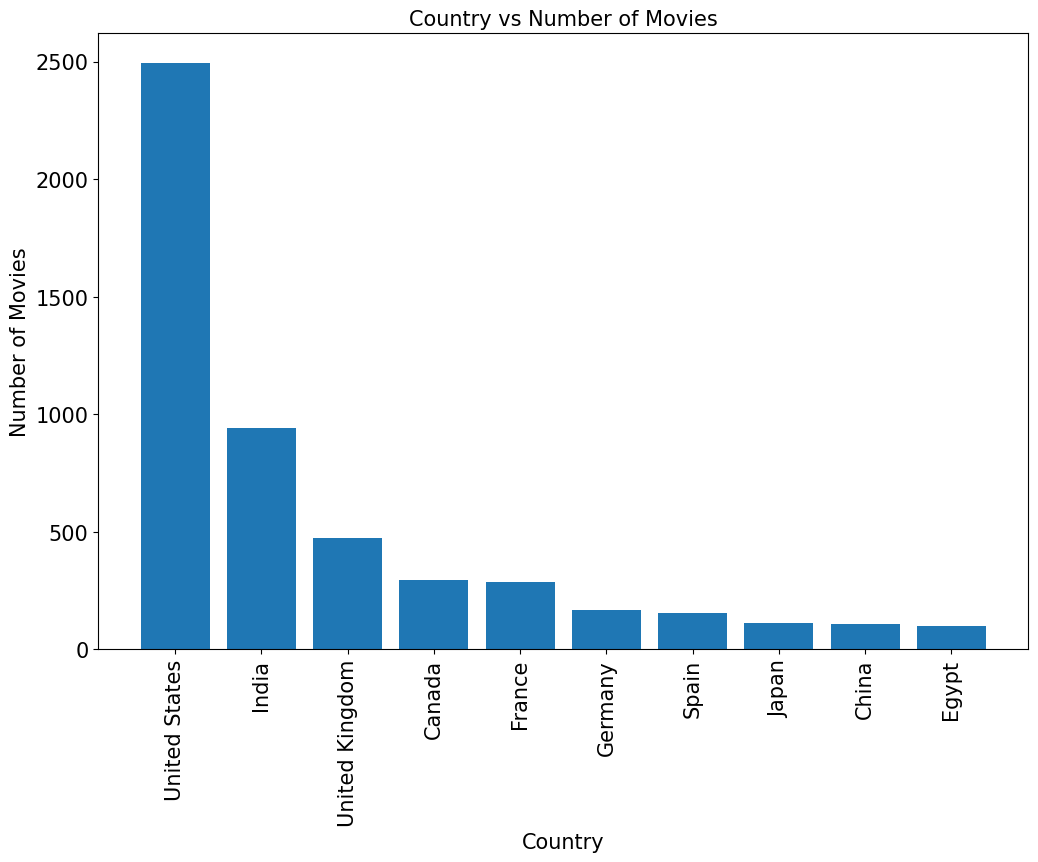

In [ ]:
# Plotting for Numbers of Movies added to Netflix in each country (top 10)

import matplotlib.pyplot as plt
import seaborn as sns

df_movies_countries_top10 = df_final[df_final['type'] == 'Movie'].groupby('country')['title'].nunique().sort_values(ascending=False).head(10)
df_movies_countries_top10 = df_movies_countries_top10.reset_index()

plt.figure(figsize=(12,8))
plt.bar(x='country', height='title', data=df_movies_countries_top10)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=90)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Number of Movies',fontsize=15)
plt.title('Country vs Number of Movies', fontsize=15)
plt.show()

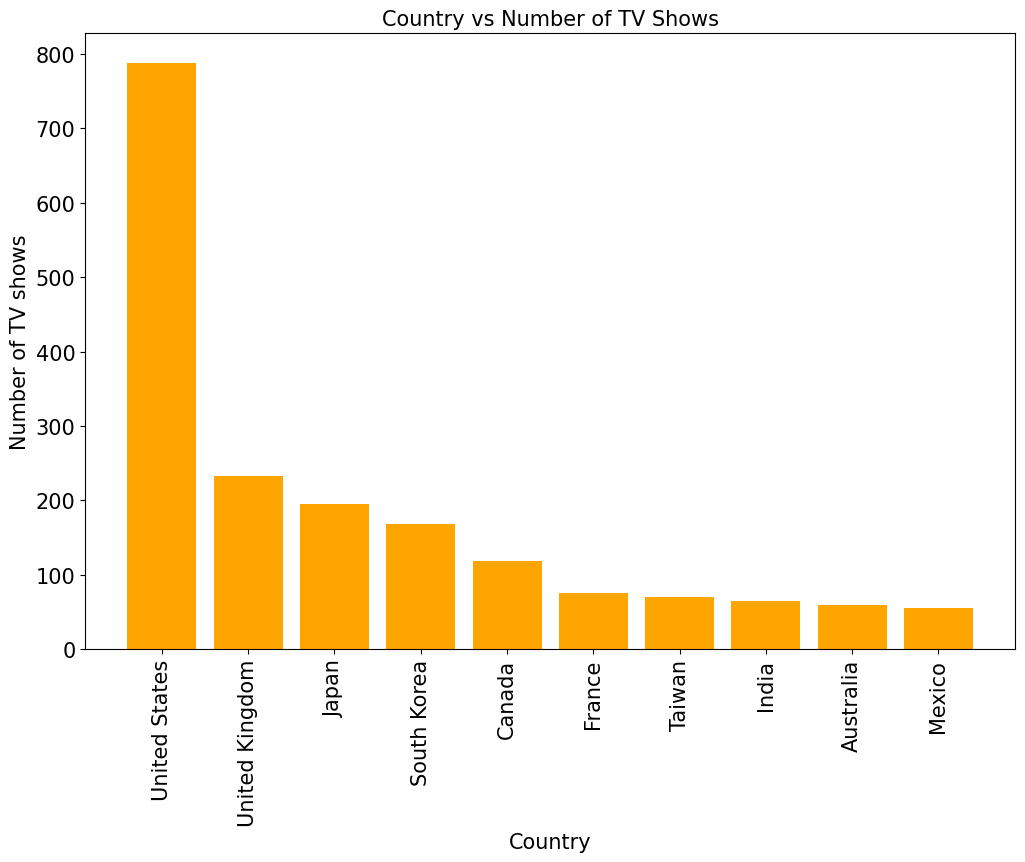

In [ ]:
# Plotting for Numbers of TV shows added to Netflix in each country (top 10)
df_tvshow_countries_top10 = df_final[df_final['type'] == 'TV Show'].groupby('country')['title'].nunique().sort_values(ascending=False).head(10)

df_tvshow_countries_top10 = df_tvshow_countries_top10.reset_index()

plt.figure(figsize=(12,8))
plt.bar(x='country', height='title', data=df_tvshow_countries_top10, color='orange')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=90)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Number of TV shows',fontsize=15)
plt.title('Country vs Number of TV Shows', fontsize=15)
plt.show()

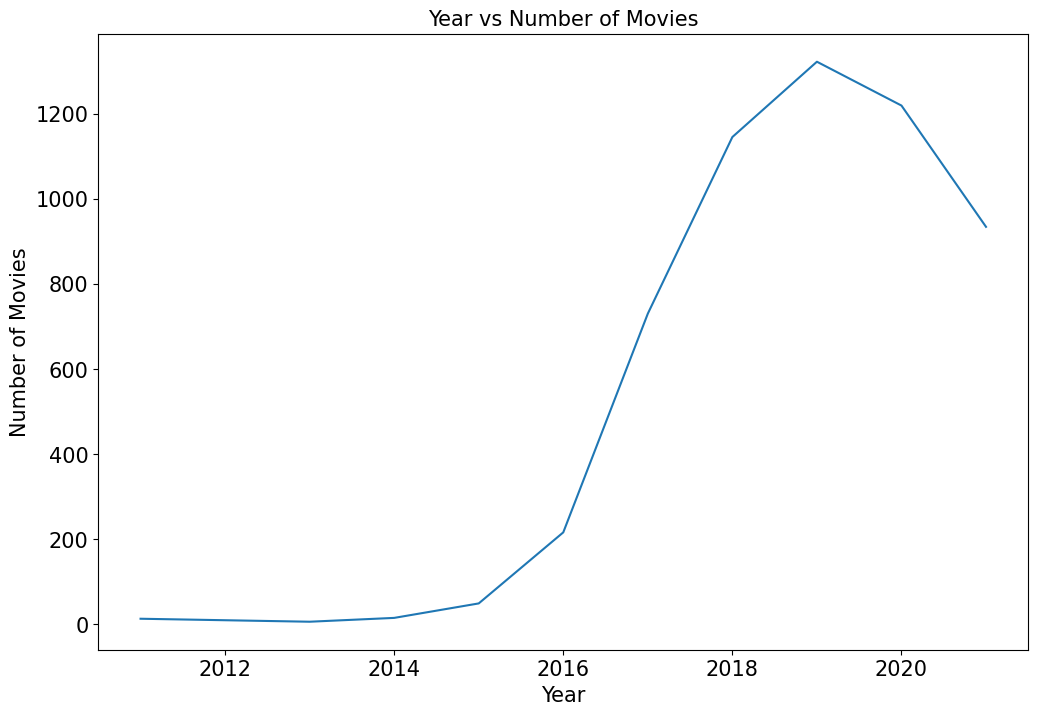

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [ ]:
df_movies_year_top10 = df_final[df_final['type'] == 'Movie'].groupby('year_added')['title'].nunique(dropna=True).sort_values(ascending=False).head(10)
df_movies_year_top10 = df_movies_year_top10.reset_index()

plt.figure(figsize=(12,8))
sns.lineplot(x='year_added', y='title', data=df_movies_year_top10)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Movies',fontsize=15)
plt.title('Year vs Number of Movies', fontsize=15)
plt.show()
plt

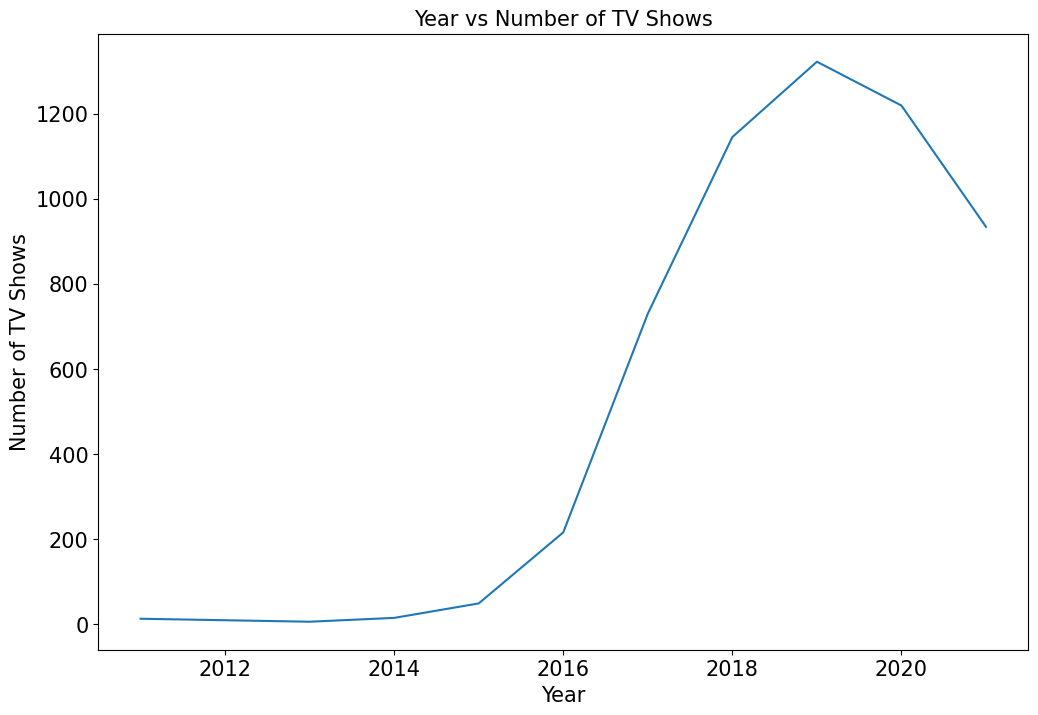

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [ ]:
df_tvshows_year_top10 = df_final[df_final['type'] == 'TV Show'].groupby('year_added')['title'].nunique(dropna=True).sort_values(ascending=False).head(10)
df_tvshows_year_top10 = df_tvshows_year_top10.reset_index()

plt.figure(figsize=(12,8))
sns.lineplot(x='year_added', y='title', data=df_movies_year_top10)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of TV Shows',fontsize=15)
plt.title('Year vs Number of TV Shows', fontsize=15)
plt.show()
plt

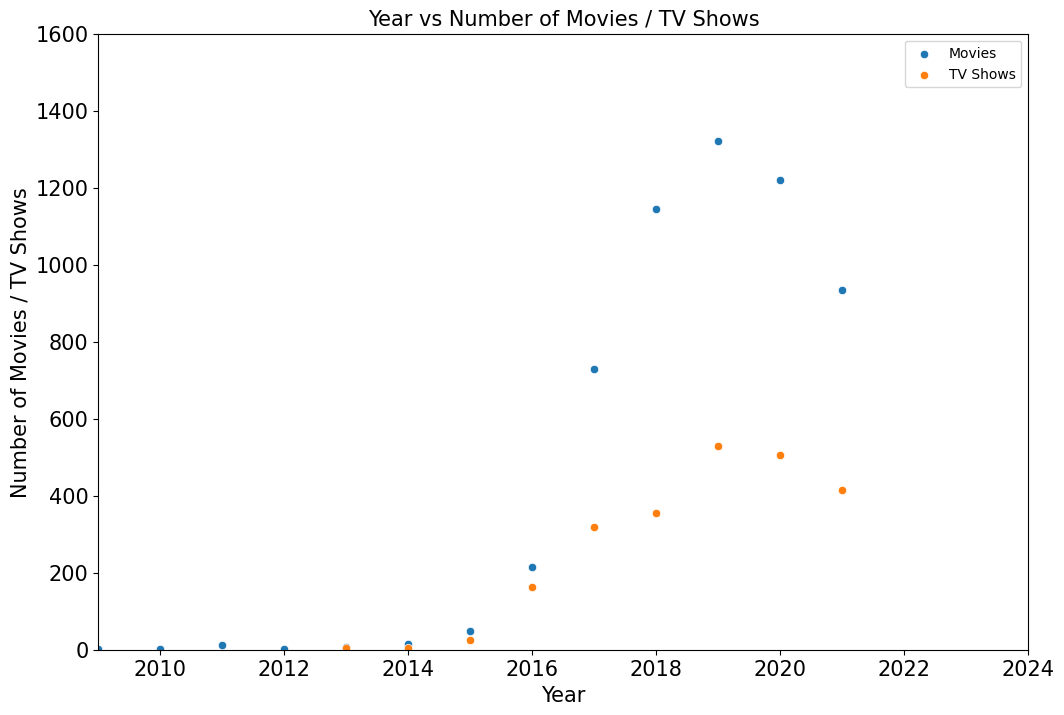

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [ ]:
# Co-relation of Number of Movies and Number of TV Shows per year
df_movies_year_top20 = df_final[df_final['type'] == 'Movie'].groupby('year_added')['title'].nunique(dropna=True).sort_values(ascending=False).head(20)
df_movies_year_top20 = df_movies_year_top20.reset_index()

df_tvshows_year_top20 = df_final[df_final['type'] == 'TV Show'].groupby('year_added')['title'].nunique(dropna=True).sort_values(ascending=False).head(20)
df_tvshows_year_top20 = df_tvshows_year_top20.reset_index()

plt.figure(figsize=(12,8))

plt.xlim(2009, 2024)
plt.ylim(0, 1600)
sns.scatterplot(x='year_added', y='title', data=df_movies_year_top20, label='Movies')
sns.scatterplot(x='year_added', y='title', data=df_tvshows_year_top20, label='TV Shows')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Movies / TV Shows',fontsize=15)
plt.title('Year vs Number of Movies / TV Shows', fontsize=15)
plt.show()
plt


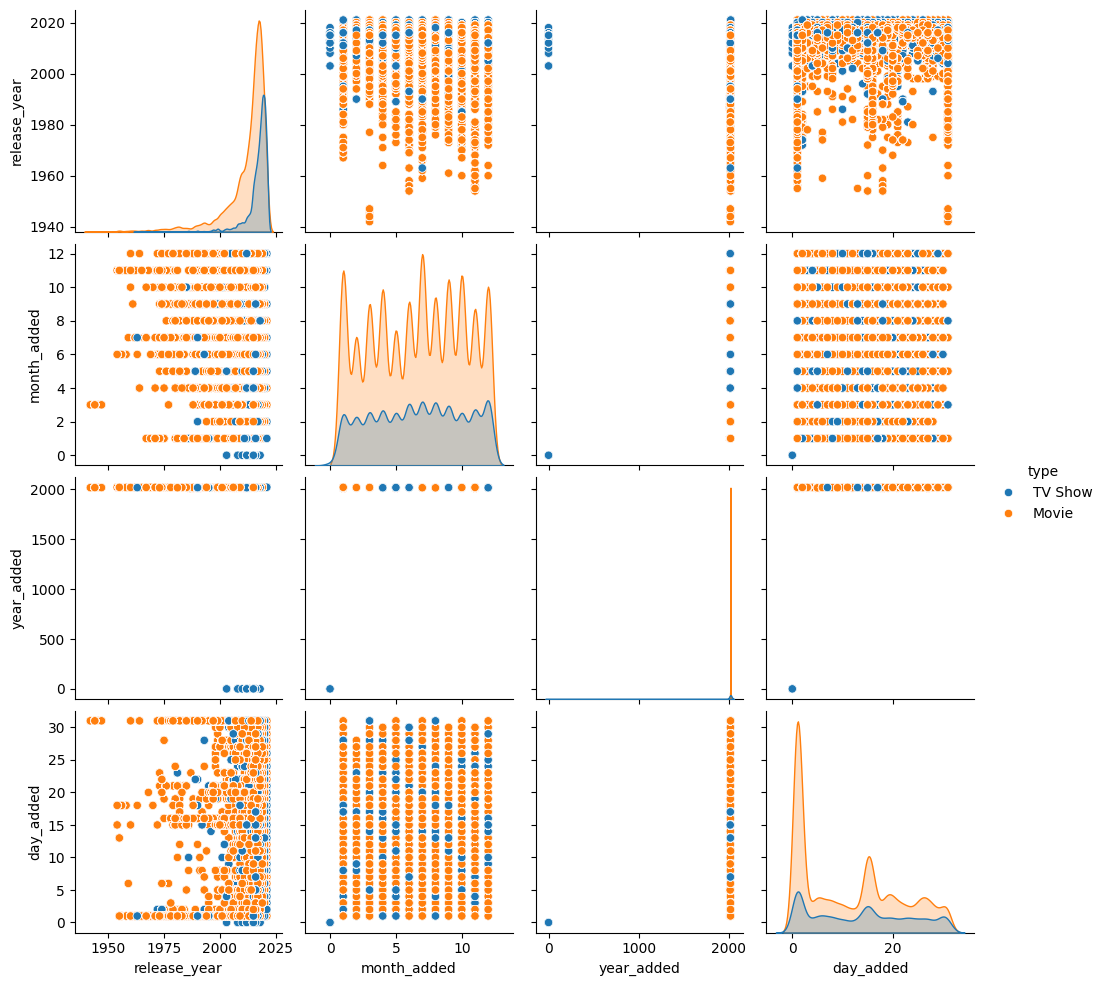

In [ ]:
sns.pairplot(df_final, hue = 'type')
plt.show()

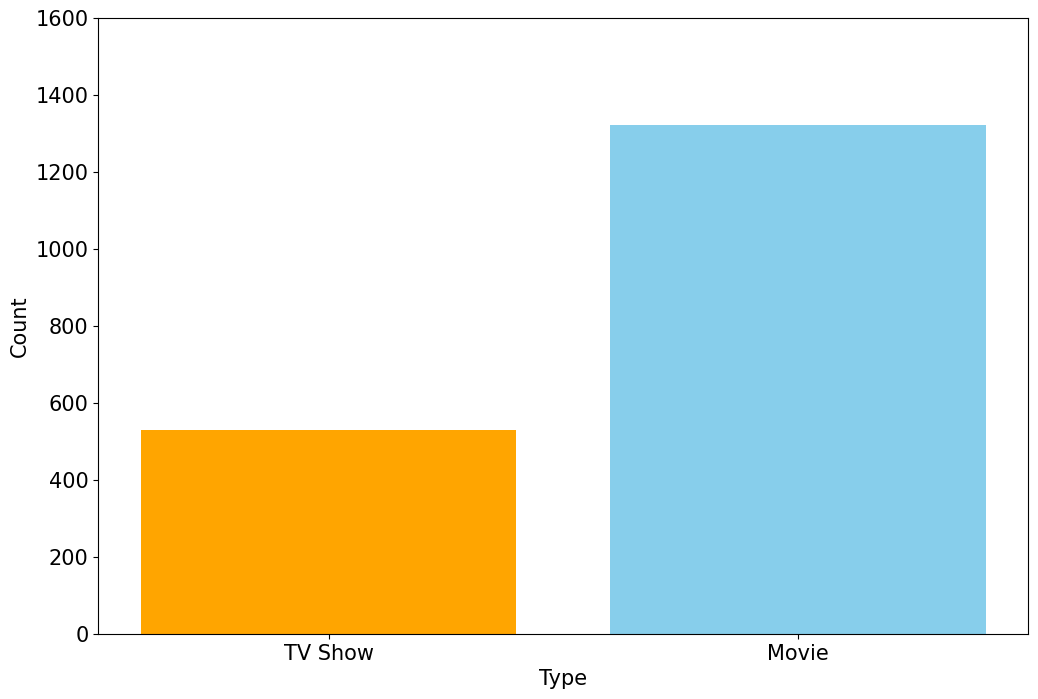

In [ ]:
# Number of Movies vs TV Shows
total_type = df_final.groupby(['year_added', 'type'])['title'].nunique(dropna=True).reset_index()
total_type.columns = ['Year', 'Type', 'Count']  # Rename columns
plt.figure(figsize=(12,8))
plt.ylim(0, 1600)
plt.bar(x=total_type['Type'], height=total_type['Count'], color = ['skyblue', 'orange'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Type',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

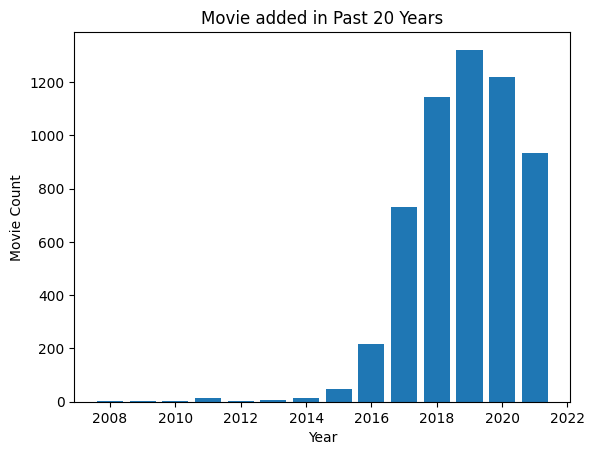

In [ ]:
# Number of movies added each year in last 20 years
df_movies_per_year = df_final[df_final['type'] == 'Movie'].groupby('year_added')['title'].nunique(dropna=True).sort_values(ascending=False).head(20)

x = df_movies_per_year.index
y = df_movies_per_year
plt.bar(x, y)
plt.xlabel('Year')
plt.ylabel('Movie Count')
plt.title('Movie added in Past 20 Years')
plt.show()

<ipython-input-151-a1495c256681>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=movies_df.values, y=movies_df.index, palette="pastel")


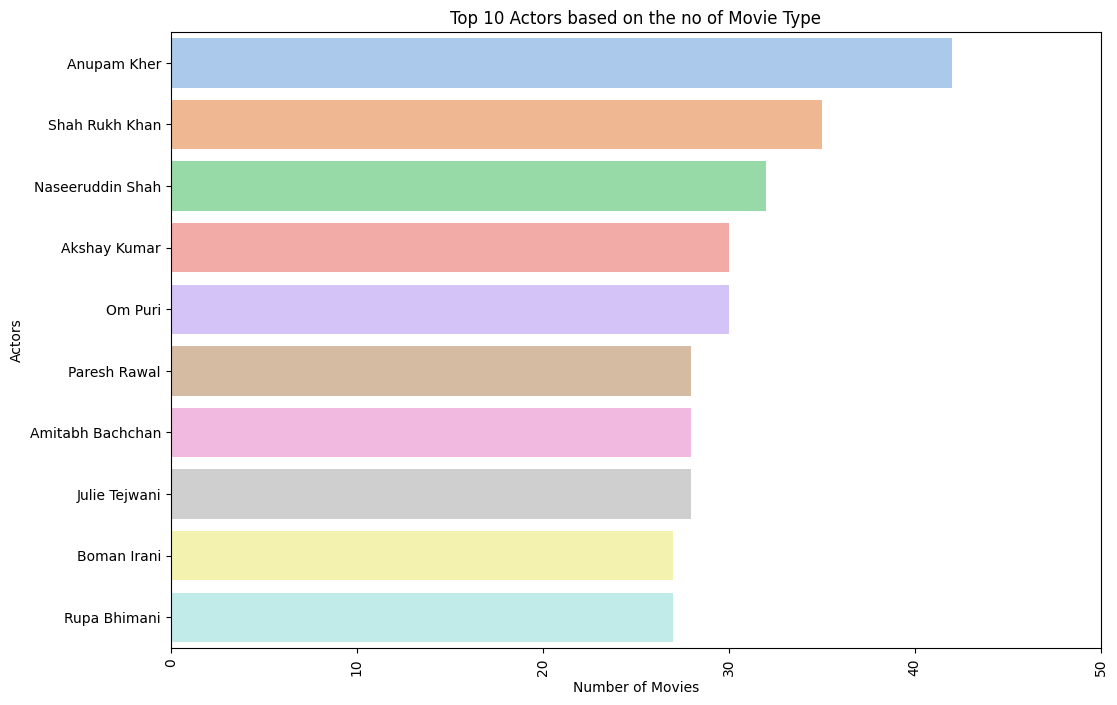

In [ ]:
#Top Actors based on movie titles
import seaborn as sns
movies_df = df_final[df_final['type'] == 'Movie']
movies_df = movies_df.groupby('cast')['title'].nunique().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
plt.title("Top 10 Actors based on the no of Movie Type")
plt.xlim(0,50)
plt.ylim(0,10)
sns.barplot(x=movies_df.values, y=movies_df.index, palette="pastel")
plt.xlabel('Number of Movies')
plt.ylabel('Actors')
plt.xticks(rotation=90)
plt.show()

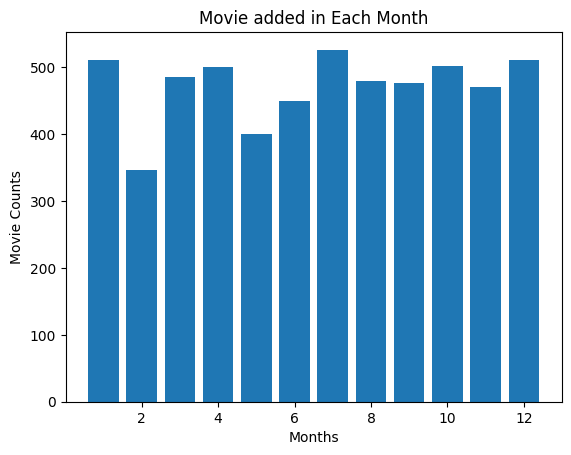

In [ ]:
# Number of movies added in each month
df_month_movies = df_final[df_final['type'] == 'Movie'].groupby('month_added')['title'].nunique(dropna=True)

x = df_month_movies.index
y = df_month_movies
plt.bar(x, y)
plt.xlabel('Months')
plt.ylabel('Movie Counts')
plt.title('Movie added in Each Month')
plt.show()

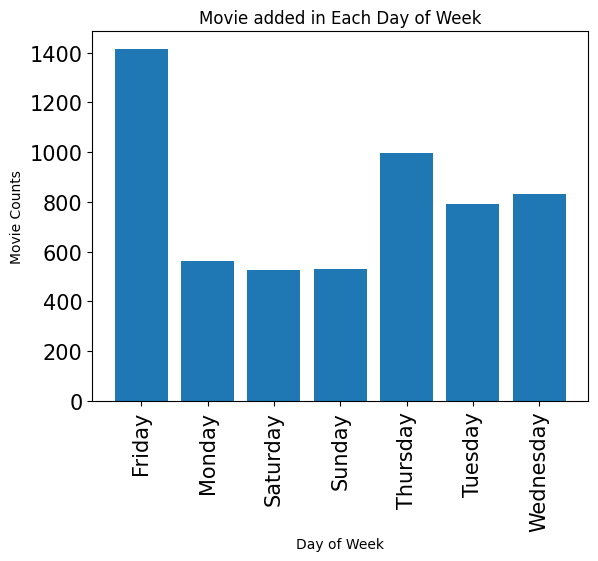

In [ ]:
# movies added to Netflix in a day of week
df_weekday_movies = df_final[df_final['type'] == 'Movie'].groupby('day_of_week_added')['title'].nunique(dropna=True)

x = df_weekday_movies.index
y = df_weekday_movies
plt.bar(x, y)
plt.xlabel('Day of Week')
plt.ylabel('Movie Counts')
plt.title('Movie added in Each Day of Week')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=90)
plt.show()

<ipython-input-174-dc9e394cfc1f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=movies_genre_df.values, y=movies_genre_df.index, palette="pastel")


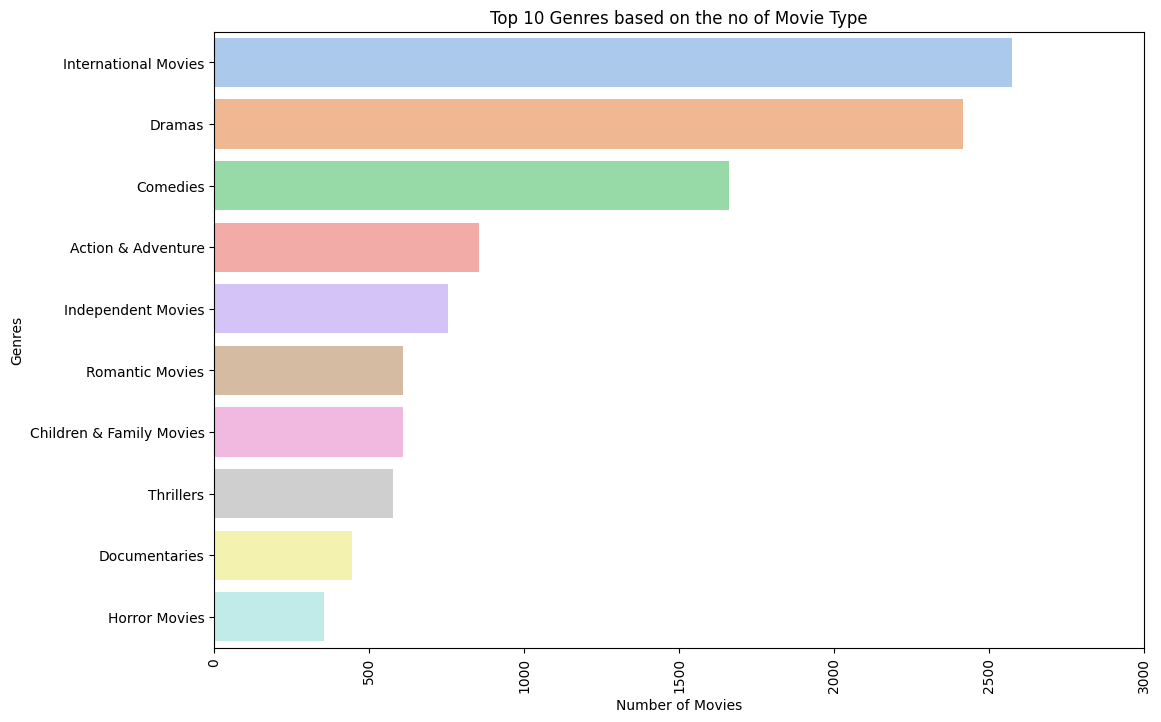

In [ ]:
# Top 10 Movie Genres
movies_genre_df = df_final[(df_final['type'] == 'Movie') & (df_final['listed_in'].notna())].groupby('listed_in')['title'].nunique().sort_values(ascending=False).head(10)


plt.figure(figsize=(12, 8))
plt.title("Top 10 Genres based on the no of Movie Type")
plt.xlim(0,3000)
plt.ylim(0,10)
sns.barplot(x=movies_genre_df.values, y=movies_genre_df.index, palette="pastel")
plt.xlabel('Number of Movies')
plt.ylabel('Genres')
plt.xticks(rotation=90)
plt.show()


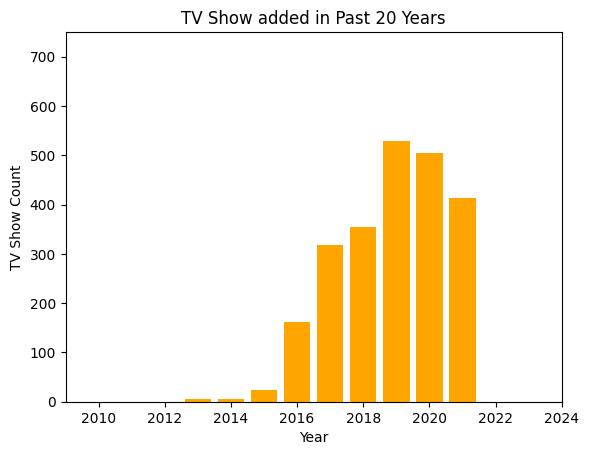

In [ ]:
# Number of TV Shows added each year in last 20 years
df_tvshows_per_year = df_final[df_final['type'] == 'TV Show'].groupby('year_added')['title'].nunique(dropna=True).sort_values(ascending=False).head(20)
df_tvshows_per_year
x = df_tvshows_per_year.index
y = df_tvshows_per_year
plt.xlim(2009, 2024)
plt.ylim(0, 750)
plt.bar(x, y, color = 'orange')
plt.xlabel('Year')
plt.ylabel('TV Show Count')
plt.title('TV Show added in Past 20 Years')
plt.show()

<ipython-input-152-14737e16ca89>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tvshows_df.values, y=tvshows_df.index, palette="pastel")


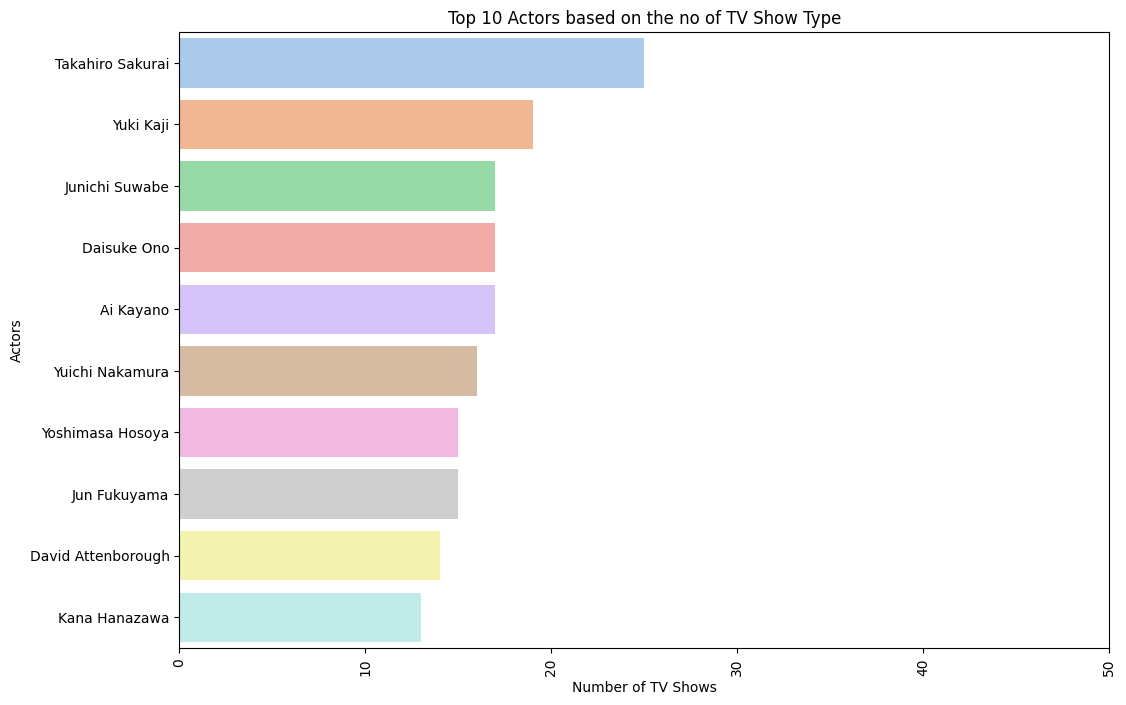

In [ ]:
#Top Actors based on TV Show titles
import seaborn as sns
tvshows_df = df_final[df_final['type'] == 'TV Show']
tvshows_df = tvshows_df.groupby('cast')['title'].nunique().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
plt.title("Top 10 Actors based on the no of TV Show Type")
plt.xlim(0,50)
plt.ylim(0,10)
sns.barplot(x=tvshows_df.values, y=tvshows_df.index, palette="pastel")
plt.xlabel('Number of TV Shows')
plt.ylabel('Actors')
plt.xticks(rotation=90)
plt.show()

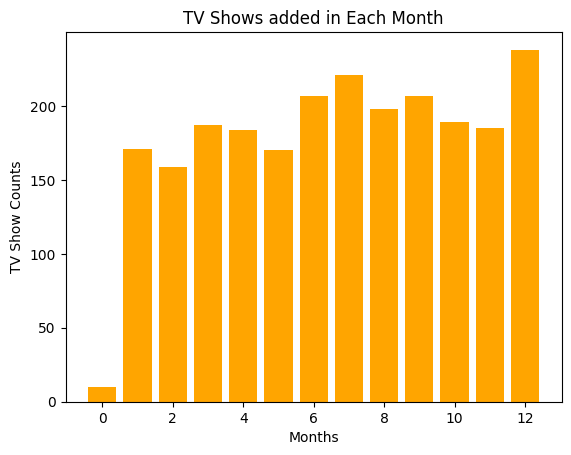

In [ ]:
# Number of TV Shows added in each month
df_month_tvshows = df_final[df_final['type'] == 'TV Show'].groupby('month_added')['title'].nunique(dropna=True)

x = df_month_tvshows.index
y = df_month_tvshows
plt.bar(x, y, color='orange')
plt.xlabel('Months')
plt.ylabel('TV Show Counts')
plt.title('TV Shows added in Each Month')
plt.show()

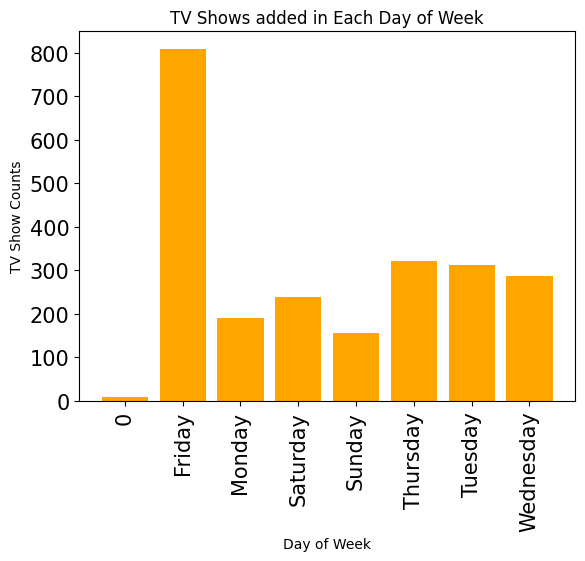

In [ ]:
# tv shows added to Netflix in a day of week
df_weekday_tvshows = df_final[df_final['type'] == 'TV Show'].groupby('day_of_week_added')['title'].nunique(dropna=True)

x = df_weekday_tvshows.index
y = df_weekday_tvshows
plt.bar(x, y, color = 'orange')
plt.xlabel('Day of Week')
plt.ylabel('TV Show Counts')
plt.title('TV Shows added in Each Day of Week')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=90)
plt.show()

<ipython-input-173-e187f6da21a2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tvshows_genre_df.values, y=tvshows_genre_df.index, palette="pastel")


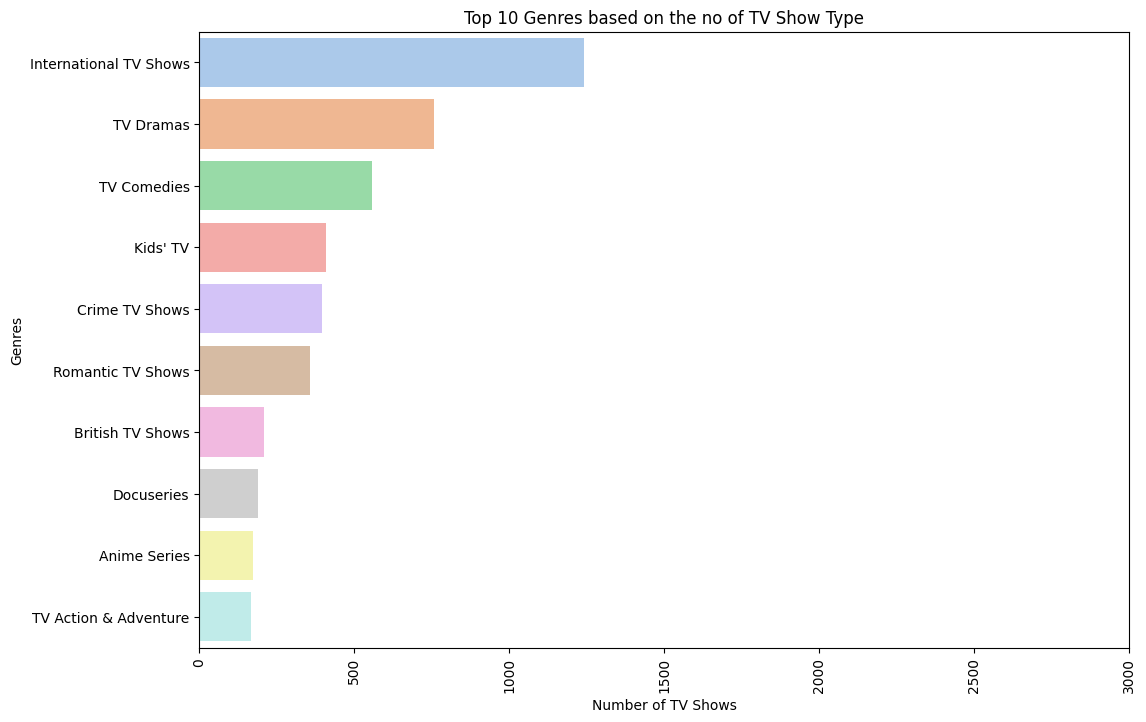

In [ ]:
# Top 10 TV Show Genres
tvshows_genre_df = df_final[(df_final['type'] == 'TV Show') & (df_final['listed_in'].notna())].groupby('listed_in')['title'].nunique().sort_values(ascending=False).head(10)


plt.figure(figsize=(12, 8))
plt.title("Top 10 Genres based on the no of TV Show Type")
plt.xlim(0,3000)
plt.ylim(0,10)
sns.barplot(x=tvshows_genre_df.values, y=tvshows_genre_df.index, palette="pastel")
plt.xlabel('Number of TV Shows')
plt.ylabel('Genres')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_final['rating'].value_counts(dropna=True).sort_values(ascending=False)

,count
rating,
TV-MA,72977
TV-14,43404
R,25843
PG-13,16201
TV-PG,14558
PG,10905
TV-Y7,6257
TV-Y,3608
TV-G,2674


In [ ]:
df_month_movies = df_final[df_final['type'] == 'Movie'].groupby('month_added')['title'].nunique(dropna=True).sort_values(ascending= False).head(12)
df_month_movies = df_month_movies.reset_index()
df_month_movies

,month_added,title
0,7,526
1,12,511
2,1,510
3,10,502
4,4,500
5,3,485
6,8,479
7,9,476
8,11,471
9,6,449


In [ ]:
df_month_tvshows = df_final[df_final['type'] == 'TV Show'].groupby('month_added')['title'].nunique(dropna=True).sort_values(ascending= False).head(12)
df_month_tvshows = df_month_tvshows.reset_index()
df_month_tvshows

,month_added,title
0,12,238
1,7,221
2,6,207
3,9,207
4,8,198
5,10,189
6,3,187
7,11,185
8,4,184
9,1,171
